<a href="https://colab.research.google.com/github/WardaAli-00/Programming-For-Ai-Assignment/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

In [4]:
# Handle missing values (remove rows with NaNs)
data.dropna(inplace=True)

In [5]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
X = data.drop('target', axis=1)
y = data['target']

In [8]:
# Features and target
X = X[X.index.isin(y.index)] # Keep only the indices that are present in both X and y
y = y[y.index.isin(X.index)] #   # Reclassify target as binary (0, 1)


In [9]:
print(X.shape)
print(y.shape)

(297, 13)
(297,)


In [11]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
print(X_scaled.min(axis=0))
print(X_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", probability=True),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [14]:
# Evaluation function
def evaluate_model(model, X, y, cv_folds):
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, X, y, cv=skf, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=skf, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=skf, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=skf, scoring='f1').mean()
    return accuracy, precision, recall, f1

In [15]:
# Cross-validation results
results = []
for name, clf in classifiers.items():
    for folds in [5, 10]:
        accuracy, precision, recall, f1 = evaluate_model(clf, X_scaled, y, cv_folds=folds)
        results.append({
            "Model": name,
            "Folds": folds,
            "Accuracy (%)": round(accuracy * 100, 2),
            "Precision (%)": round(precision * 100, 2),
            "Recall (%)": round(recall * 100, 2),
            "F1 Score (%)": round(f1 * 100, 2)
        })


Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1578, in _check_set_wise_labels
    raise ValueError(
ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    r

In [17]:
# Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                  Model  Folds  Accuracy (%)  Precision (%)  Recall (%)  \
0                   KNN      5         56.92            NaN         NaN   
1                   KNN     10         53.90            NaN         NaN   
2                   SVM      5         57.89            NaN         NaN   
3                   SVM     10         57.56            NaN         NaN   
4           Naive Bayes      5         53.23            NaN         NaN   
5           Naive Bayes     10         52.24            NaN         NaN   
6         Random Forest      5         56.59            NaN         NaN   
7         Random Forest     10         58.30            NaN         NaN   
8   Logistic Regression      5         58.57            NaN         NaN   
9   Logistic Regression     10         58.56            NaN         NaN   
10    Gradient Boosting      5         52.85            NaN         NaN   
11    Gradient Boosting     10         52.85            NaN         NaN   

    F1 Score (%)  
0    

In [18]:
# Visualize results
import seaborn as sns
import matplotlib.pyplot as plt

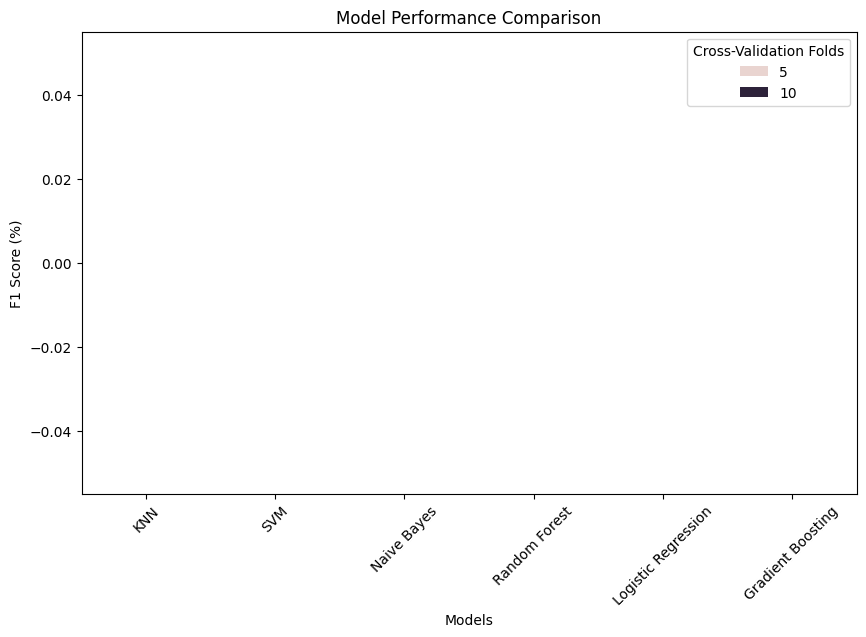

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="F1 Score (%)", hue="Folds")
plt.title("Model Performance Comparison")
plt.ylabel("F1 Score (%)")
plt.xlabel("Models")
plt.legend(title="Cross-Validation Folds")
plt.xticks(rotation=45)
plt.show()

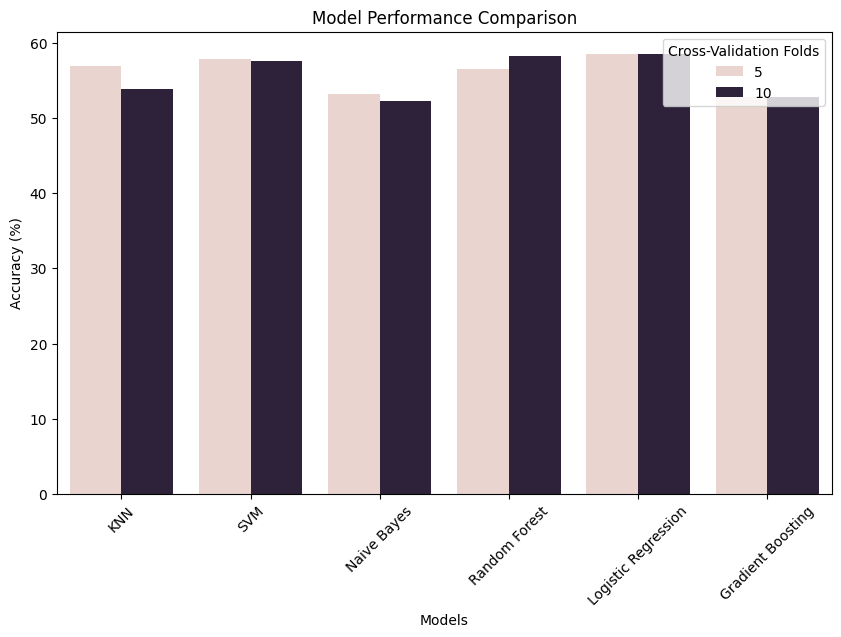

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy (%)", hue="Folds")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.legend(title="Cross-Validation Folds")
plt.xticks(rotation=45)
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

In [27]:
def perform_eda(data):
    print("Dataset Information:")
    print(data.info())
    print("\nBasic Statistics:")
    print(data.describe())

In [28]:
# Univariate Analysis
def create_univariate_plots(data):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns[:-1], start=1):
        plt.subplot(4, 4, i)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

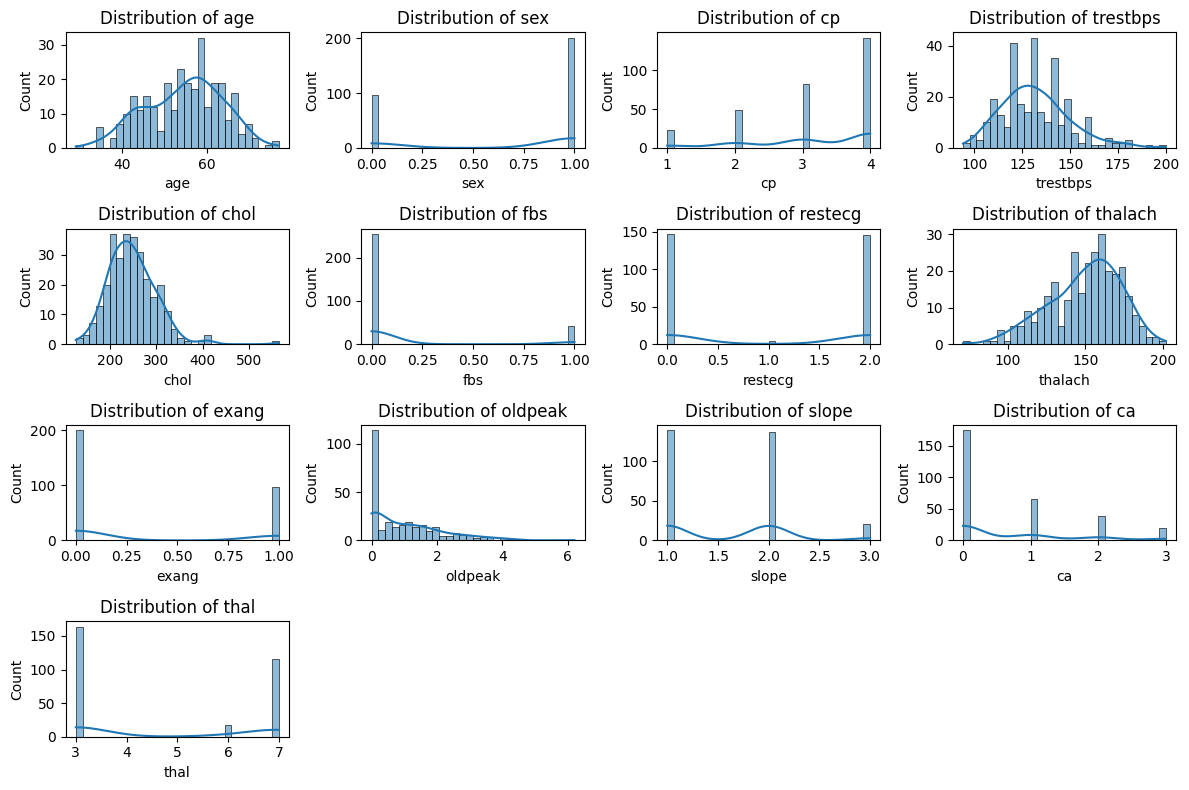

In [31]:
create_univariate_plots(data)

In [34]:
# Correlation Heatmap
def create_correlation_heatmap(data):
    plt.figure(figsize=(10, 6))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

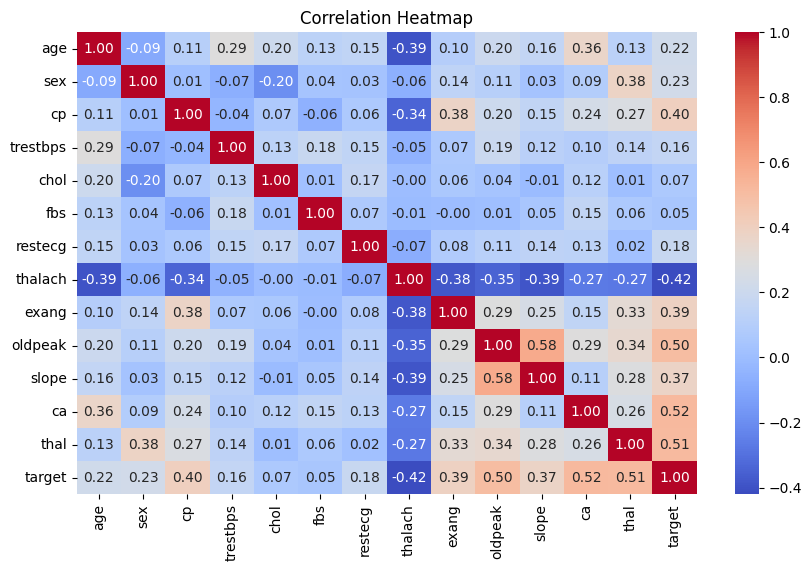

In [35]:
create_correlation_heatmap(data)

In [36]:
 # Bivariate Analysis: Target vs Features
 def create_bivariate_plots(data):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns[:-1], start=1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=data["target"], y=data[col], palette="Set2")
        plt.title(f"Target vs {col}")
    plt.tight_layout()
    plt.show()


<ipython-input-36-f612bee8fc85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["target"], y=data[col], palette="Set2")
<ipython-input-36-f612bee8fc85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["target"], y=data[col], palette="Set2")
<ipython-input-36-f612bee8fc85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["target"], y=data[col], palette="Set2")
<ipython-input-36-f612bee8fc85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

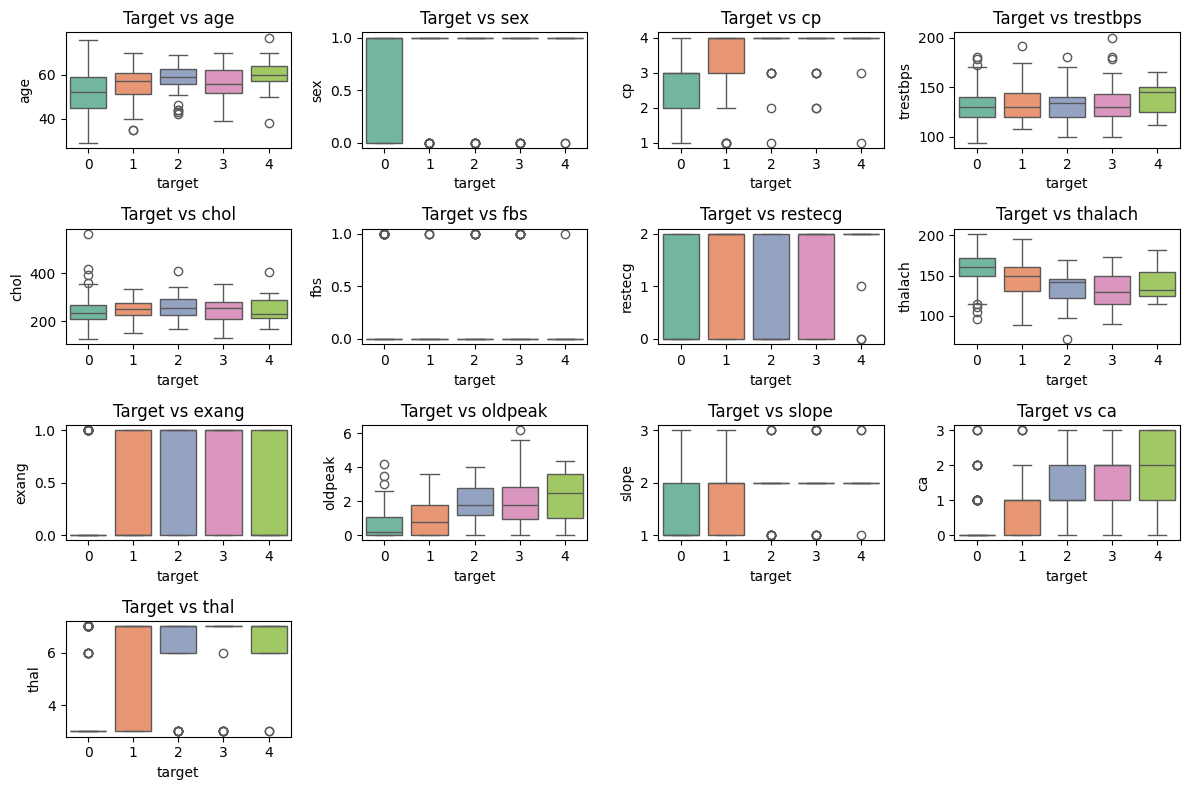

In [37]:
create_bivariate_plots(data)

In [38]:
perform_eda(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None

Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088

In [39]:
scaler = MinMaxScaler()
custom_transformer = FunctionTransformer(np.log1p, validate=True)  # Example of a custom transformation
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", scaler, X.columns),
        ("custom_transform", custom_transformer, ["chol", "trestbps"]),  # Apply log transformation to specific columns
    ],
    remainder="passthrough"  # Keep other columns as is
)


In [40]:
# Combine Preprocessing Steps into a Pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
])

# Preprocess features
X_preprocessed = pipeline.fit_transform(X)


In [41]:
# Display Processed Data
print("\nPreprocessed Features (First 5 rows):")

# Get column names after transformation
# Assuming 'scaler' and 'custom_transform' are your transformer names
transformed_col_names = pipeline.named_steps['preprocessing'].transformers_[0][2]  # Get scaled column names
transformed_col_names = list(transformed_col_names)  # Convert to a list if it's not already
transformed_col_names.extend(pipeline.named_steps['preprocessing'].transformers_[1][2]) # Add custom transformed column names

# Create a DataFrame with the correct column names
print(pd.DataFrame(X_preprocessed, columns=transformed_col_names).head())



Preprocessed Features (First 5 rows):
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal      chol  trestbps  
0  0.370968    1.0  0.000000  0.75  5.455321  4.983607  
1  0.241935    0.5  1.000000  0.00  5.659482  5.081404  
2  0.419355    0.5  0.666667  1.00  5.438079  4.795791  
3  0.564516    1.0  0.000000  0.00  5.525453  4.875197  
4  0.225806    0.0  0.000000  0.00  5.323010  4.875197  
